# Hotel Booking

This dataset contains 119,390 observations for a City Hotel and a Resort Hotel. Each observation represents a hotel booking between the 1st of July 2015 and 31st of August 2017, including booking that effectively arrived and booking that were canceled.

**Features**:

1. hotel: One of the hotels is a resort hotel and the other is a city hotel.
2. is_canceled:  Value indicating if the booking was canceled (1) or not (0).
3. lead_time: Number of days that elapsed between the entering date of the booking into the PMS and the arrival date.
5. arrival_date_year: Year of arrival date.
6. arrival_date_month: Month of arrival date with 12 categories: “January” to “December”.
7. arrival_date_week_number: Week number of the arrival date.
8. arrival_date_day_of_month: Day of the month of the arrival date.
9. stays_in_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel.
10. stays_in_week_nights: Number of week nights (Monday to Friday) the guest stayed.
11. adults: Number of adults
12. children: Number of Childern
13. babies: Number of Babies
14. meal: BB – Bed & Breakfast
15. country: Country of origin.
16. market_segment: Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”
17. distribution_channel: Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”
18. is_repeated_guest: Value indicating if the booking name was from a repeated guest (1) or not (0)
19. previous_cancellations: Number of previous bookings that were cancelled by the customer prior to the current booking
20. previous_bookings_not_canceled: Number of previous bookings not cancelled by the customer prior to the current booking
21. reserved_room_type: Code of room type reserved. Code is presented instead of designation for anonymity reasons.
22. assigned_room_type: Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved
23. room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons
24. booking_changes: Number of changes/amendments made to the booking.
25. deposit_type: No Deposit – no deposit was made; Non Refund – a deposit was made in the value of the total stay cost; Refundable – a deposit was made with a value under the total cost of stay.
26. agent: ID of the travel agency that made the booking
27. company: ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons
28. days_in_waiting_list: Number of days the booking was in the waiting list before it was confirmed to the customer
29. customer_type: Group – when the booking is associated to a group; Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; Transient-party – when the booking is transient, but is associated to at least other transient booking
30. adr: Average Daily Rate (Calculated by dividing the sum of all lodging transactions by the total number of staying nights)
31. required_car_parking_spaces: Number of car parking spaces required by the customer
32. total_of_special_requests: Number of special requests made by the customer (e.g. twin bed or high floor)
33. reservation_status: Check-Out – customer has checked in but already departed; No-Show – customer did not check-in and did inform the hotel of the reason why
34. reservation_status_date: Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel
35. name: Name of the Guest (Not Real)
36. email: Email (Not Real)
37. phone-number: Phone number (Not real)


**Problem Statement:**

Hotels continuously strive to attract more customers using various business strategies to maximize their revenue. Even when most of the hotels run a highly successful marketing campaigns, there are times when customers opt to cancel their bookings due to personal reasons or external factors. It is therefore important to understand the features that influence the behaviour of such customers so that the hotel can invest in lowering their cancellation rate to enhance their profits. The dataset will help:
- Analyze the behavioural patterns and characteristic of the customers who opt to cancel their booking
- Discover features and conditions that help in retention of the customers
- Provide actionable insights that the hotel can employ enhance customer retainability

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.impute import KNNImputer

plt.style.use('fivethirtyeight')

In [2]:
hotel=pd.read_csv("hotel_booking.csv")
hotel.shape

(119390, 36)

In [3]:
hotel.sample(4)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
75679,City Hotel,1,295,2015,August,32,8,2,2,2,...,Transient-Party,62.0,0,0,Canceled,2015-07-06,Lisa Hughes,Lisa_Hughes20@hotmail.com,525-820-4814,************7250
115719,City Hotel,0,165,2017,July,27,7,1,2,2,...,Transient-Party,152.1,0,1,Check-Out,2017-07-10,Rachel Newman,Rachel_Newman@att.com,748-446-5340,************6374
19797,Resort Hotel,0,11,2016,December,53,27,0,1,2,...,Group,103.0,0,2,Check-Out,2016-12-28,Matthew Williamson,Matthew_Williamson@mail.com,257-667-6398,************5133
5429,Resort Hotel,1,102,2016,April,18,29,1,2,2,...,Transient,113.0,0,1,Canceled,2016-01-19,Amanda Wilkerson,AmandaWilkerson@outlook.com,833-891-2036,************3167


In [4]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
hotel['reservation_status_date']=pd.to_datetime(hotel['reservation_status_date'])

In [6]:
hotel.isnull().mean()*100

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

In [7]:
hotel[hotel.duplicated()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card


In [8]:
hotel.describe().T

,count,mean,min,25%,50%,75%,max,std
is_canceled,119390.0,0.370416,0.0,0.0,0.0,1.0,1.0,0.482918
lead_time,119390.0,104.011416,0.0,18.0,69.0,160.0,737.0,106.863097
arrival_date_year,119390.0,2016.156554,2015.0,2016.0,2016.0,2017.0,2017.0,0.707476
arrival_date_week_number,119390.0,27.165173,1.0,16.0,28.0,38.0,53.0,13.605138
arrival_date_day_of_month,119390.0,15.798241,1.0,8.0,16.0,23.0,31.0,8.780829
stays_in_weekend_nights,119390.0,0.927599,0.0,0.0,1.0,2.0,19.0,0.998613
stays_in_week_nights,119390.0,2.500302,0.0,1.0,2.0,3.0,50.0,1.908286
adults,119390.0,1.856403,0.0,2.0,2.0,2.0,55.0,0.579261
children,119386.0,0.10389,0.0,0.0,0.0,0.0,10.0,0.398561
babies,119390.0,0.007949,0.0,0.0,0.0,0.0,10.0,0.097436


In [9]:
hotel[hotel['adr']<0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
14969,Resort Hotel,0,195,2017,March,10,5,4,6,2,...,Transient-Party,-6.38,0,0,Check-Out,2017-03-15,Chase Santos,Chase_Santos@outlook.com,472-408-0661,************9176


**Insights:**

Upon initial explorations of the data set I can observe the following things:
- There are no duplicate records in the dataset, ensuring data uniqueness and integrity.
- The dataset contains 36 features in total, with 20 categorized as numerical and 16 as categorical.
- Columns with significant missing values include:
  - `Company:` Approximately 94% of the values are missing, indicating limited data availability for this feature.
  - `Agent:` About 13% missing values, which may affect analysis involving booking agents.
- Columns with minimal missing data include:
  - `Children:` Only 0.03% missing values.
  - `Country:` Around 0.4% missing values.
- The columns `is_canceled` and `is_repeated_guest` are categorical variables encoded numerically:
  - The mean of is_canceled is 0.37, indicating that 37% of bookings were canceled.
- `adr`: One entry of this feature is negative, which requires a proper investigation and handeling.
- `reservation_status_date` is converted to date time object

In [10]:
for cols in hotel.describe(include='object').columns:
    print(cols.title())
    print(f"{hotel[cols].unique()}")
    print("-"*60)

Hotel
['Resort Hotel' 'City Hotel']
------------------------------------------------------------
Arrival_Date_Month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
------------------------------------------------------------
Meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
------------------------------------------------------------
Country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'C

In [11]:
hotel_copy=hotel.copy()
hotel_copy.shape

(119390, 36)

#### Working with the missing values:

In [12]:
hotel_copy.drop(columns=['company'],inplace=True)

In [13]:
missing_rows=[cols for cols in hotel_copy.columns if 0<hotel_copy[cols].isnull().mean()*100<5]
missing_rows

['children', 'country']

In [14]:
hotel_copy.dropna(subset=missing_rows,inplace=True)

In [15]:
mode_agent=hotel_copy['agent'].mode()[0]
mode_agent

np.float64(9.0)

In [16]:
hotel_copy['agent']=hotel_copy['agent'].fillna(mode_agent)

In [17]:
hotel_copy.isnull().mean()*100

hotel                             0.0
is_canceled                       0.0
lead_time                         0.0
arrival_date_year                 0.0
arrival_date_month                0.0
arrival_date_week_number          0.0
arrival_date_day_of_month         0.0
stays_in_weekend_nights           0.0
stays_in_week_nights              0.0
adults                            0.0
children                          0.0
babies                            0.0
meal                              0.0
country                           0.0
market_segment                    0.0
distribution_channel              0.0
is_repeated_guest                 0.0
previous_cancellations            0.0
previous_bookings_not_canceled    0.0
reserved_room_type                0.0
assigned_room_type                0.0
booking_changes                   0.0
deposit_type                      0.0
agent                             0.0
days_in_waiting_list              0.0
customer_type                     0.0
adr         

Numerous approaches were used to tackle the null values considering the nature and missingness in each feature:
- The feature `Company` had 94% missing values, and given the high proportion of missing values this feature was excluded from the dataset as it did not provide any useful insights and to reduce the noise.
- For columns having less than 5% missing values like `Children and Country`, the rows with missing values were dropped based on the assumptions that the values were missing completely at random.
- The feature `agent` even when it is labeled as a numerical feature, do not carry any meaningful arithematic relationship as can be treated as a categorical column. Since it consisted of 13.68% missing values, I just imputed it with the mode of the feature, which is a common practise for categorical imputation.  

#### Univaraite Analysis:

In [18]:
not_numerical=['is_canceled','is_repeated_guest','agent']

In [19]:
numerical_column=[cols for cols in hotel_copy.columns if hotel_copy[cols].dtype in ['float64','int64'] and cols not in not_numerical]
numerical_column

['lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [20]:
#Function to plot the Histogram and boxplot for numerical column:
def plot_graph(numerical_column):
    fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(12,6))
    sns.kdeplot(data=hotel_copy,x=numerical_column,fill=True,ax=ax[0],color='red',linewidth=0.8)
    ax[0].set_title(f"Histogram of {numerical_column}")
    ax[0].set_xlabel(numerical_column)
    ax[0].set_ylabel("Density")
    
    sns.boxplot(data=hotel_copy,y=numerical_column,ax=ax[1])
    ax[1].set_title(f"Boxplot of {numerical_column}")
    ax[1].set_ylabel(numerical_column)

    #Summary statistics:
    mean=hotel_copy[numerical_column].mean()
    median=hotel_copy[numerical_column].median()
    std=hotel_copy[numerical_column].std()
    skew=hotel_copy[numerical_column].skew()

    stats_text=(
        f"Mean:{round(mean,2)}\n"
        f"Median:{round(median,2)}\n"
        f"Std:{round(std,2)}\n"
        f"Skewness:{round(skew,2)}\n"
     )

    ax[0].text(
        0.98,0.98,
        stats_text,
        ha='right',
        va='top',
        transform=ax[0].transAxes,
        bbox=dict(facecolor='white', alpha=0.7,edgecolor='black',linewidth=1.5),
        fontsize=10
    )

    plt.show()

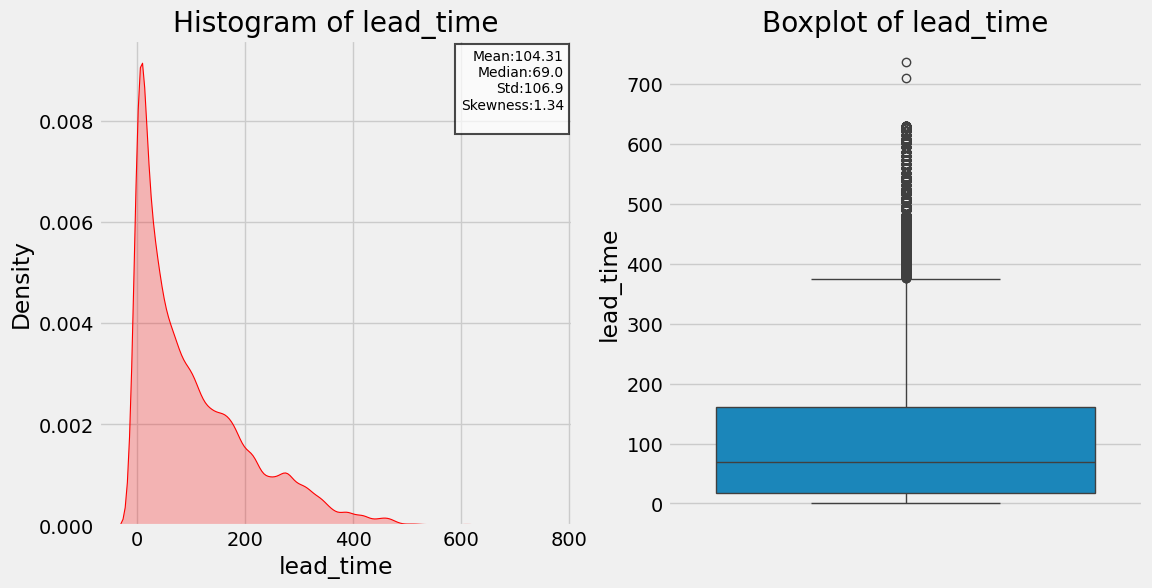

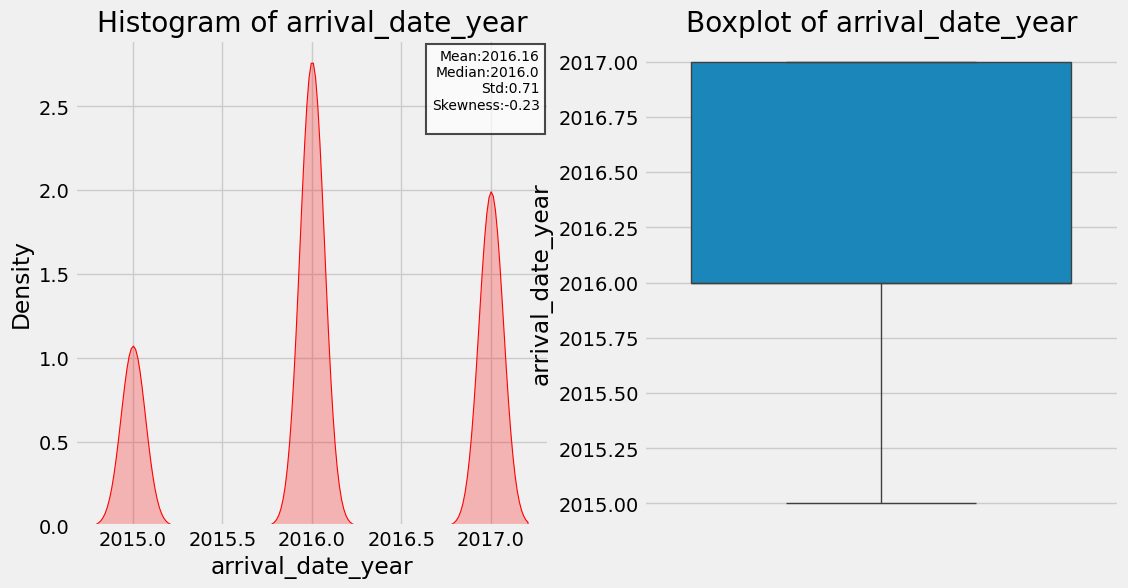

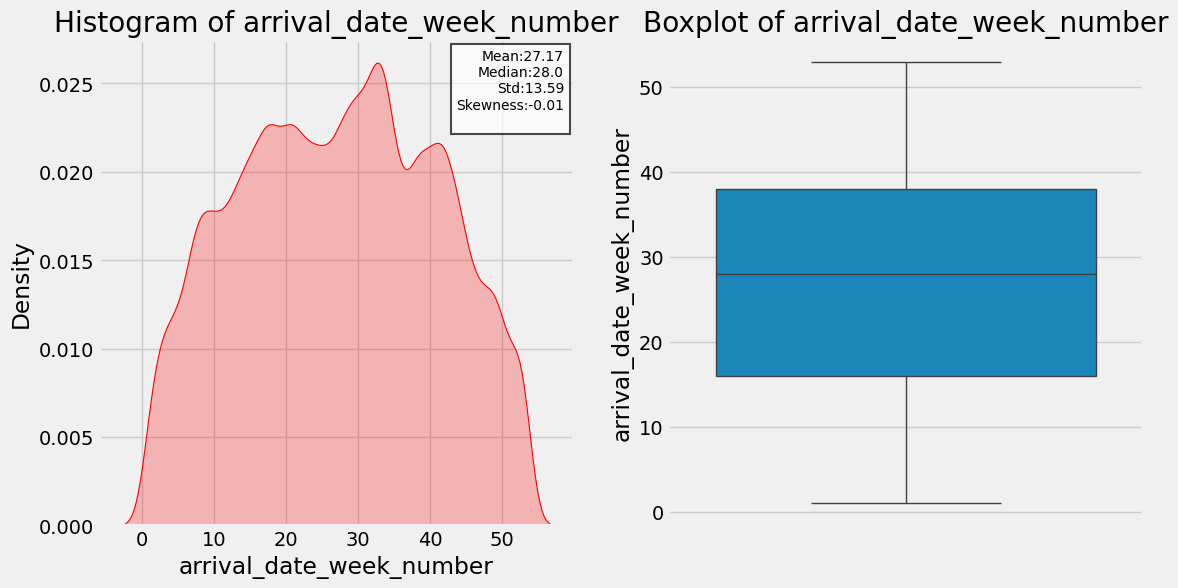

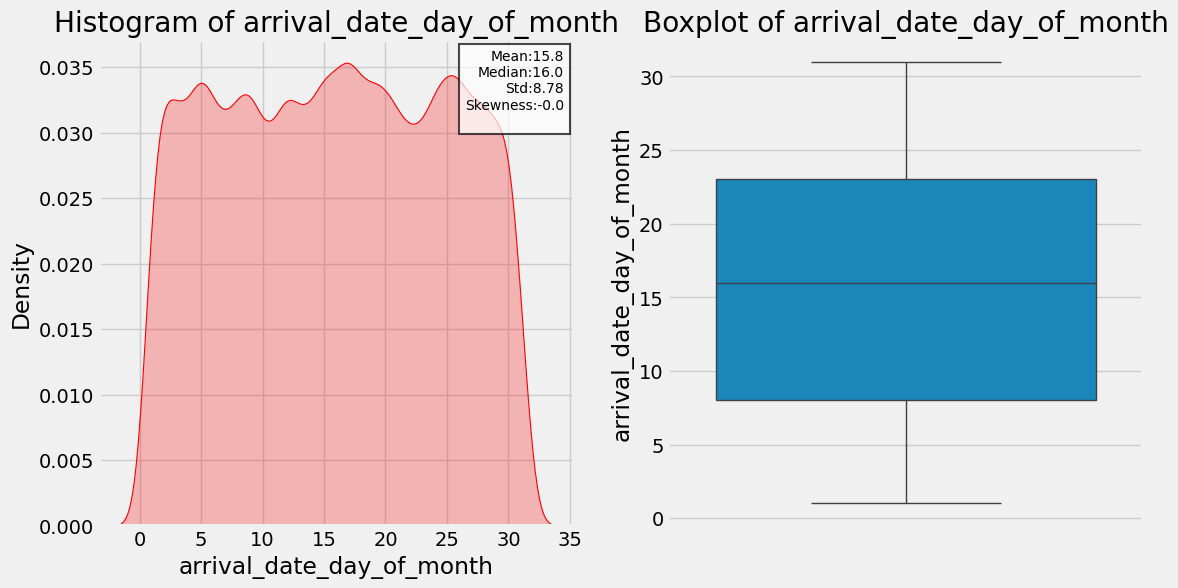

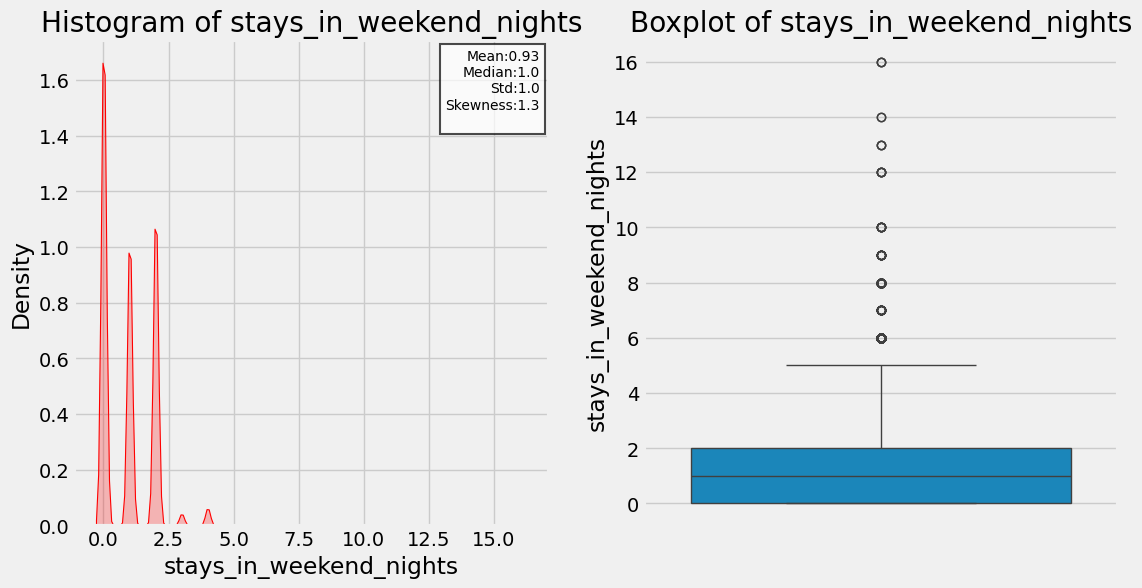

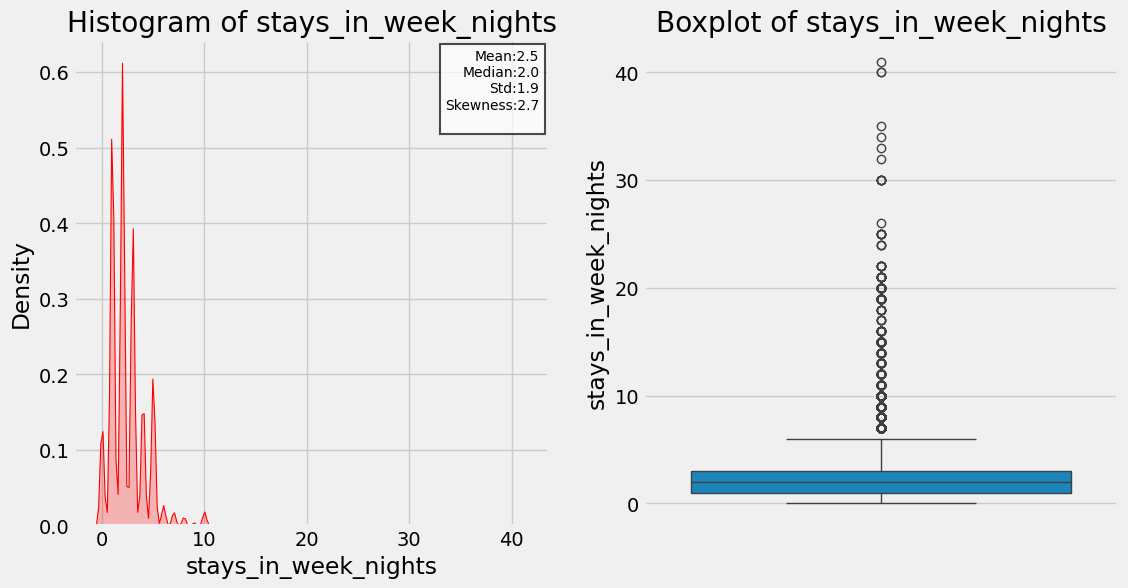

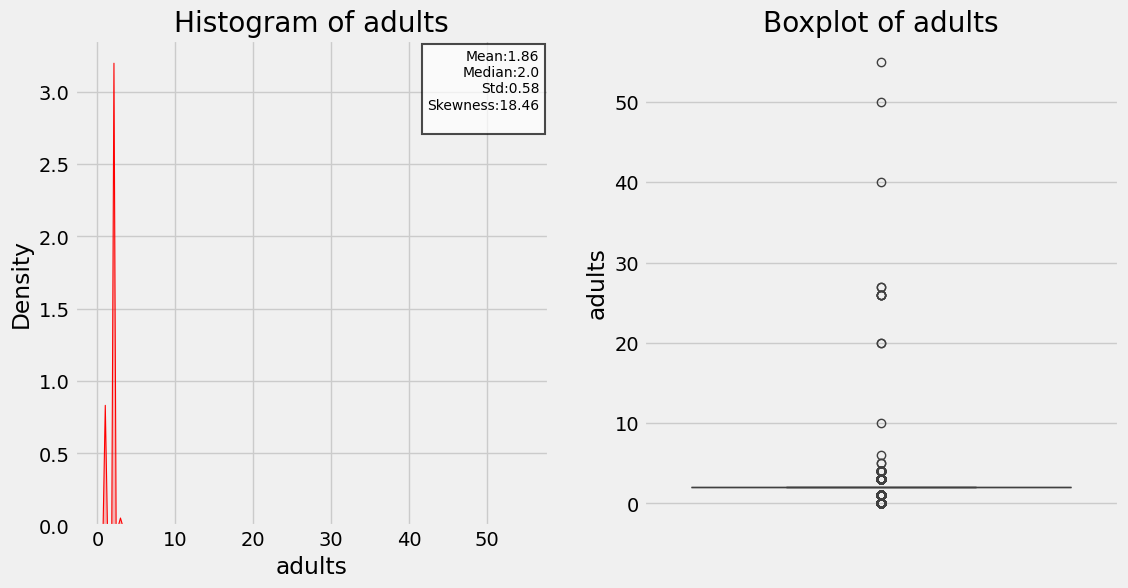

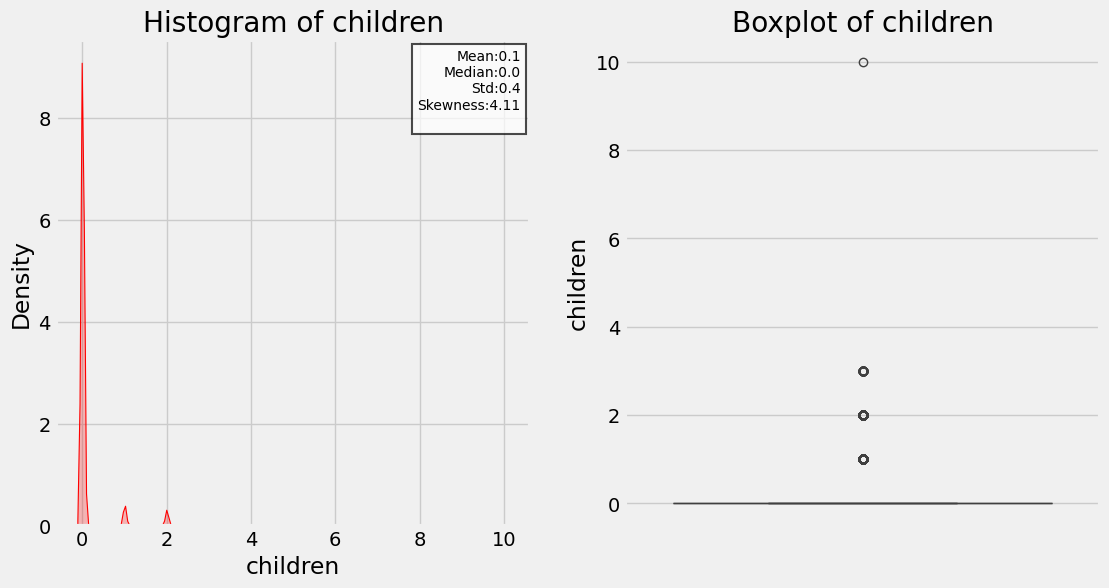

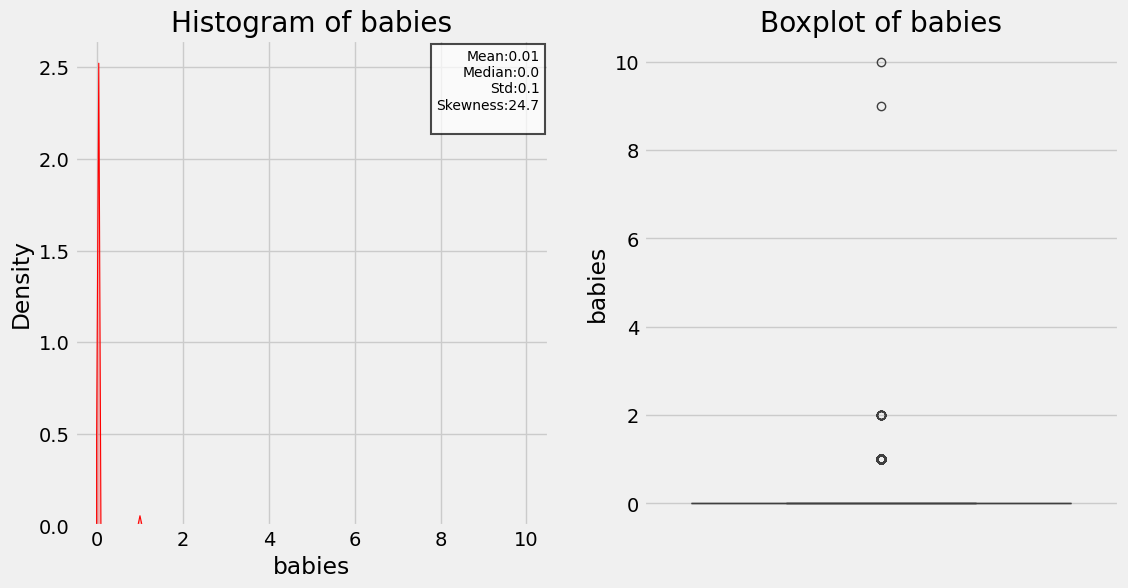

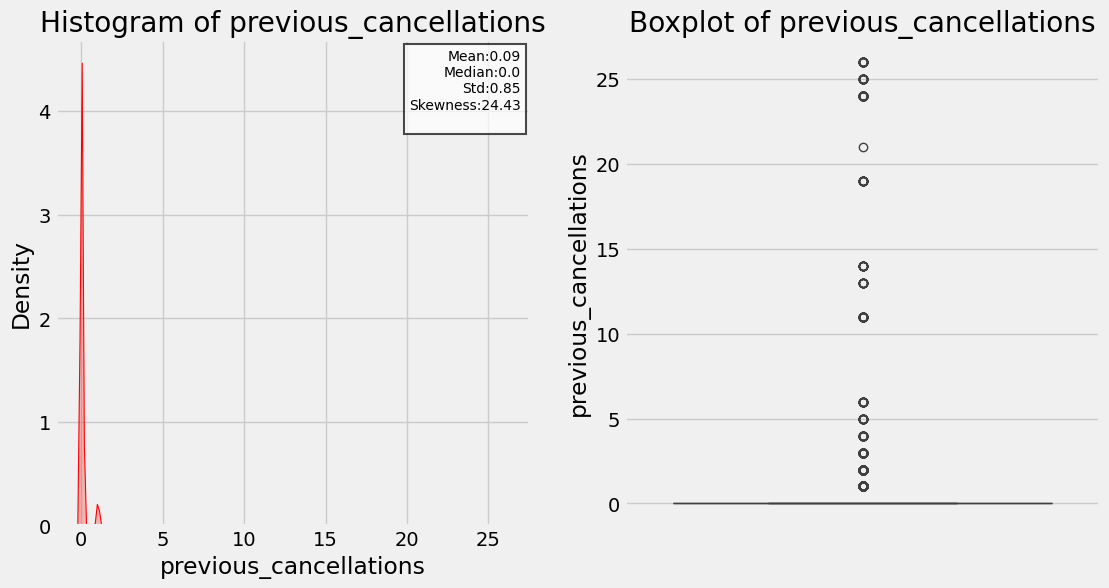

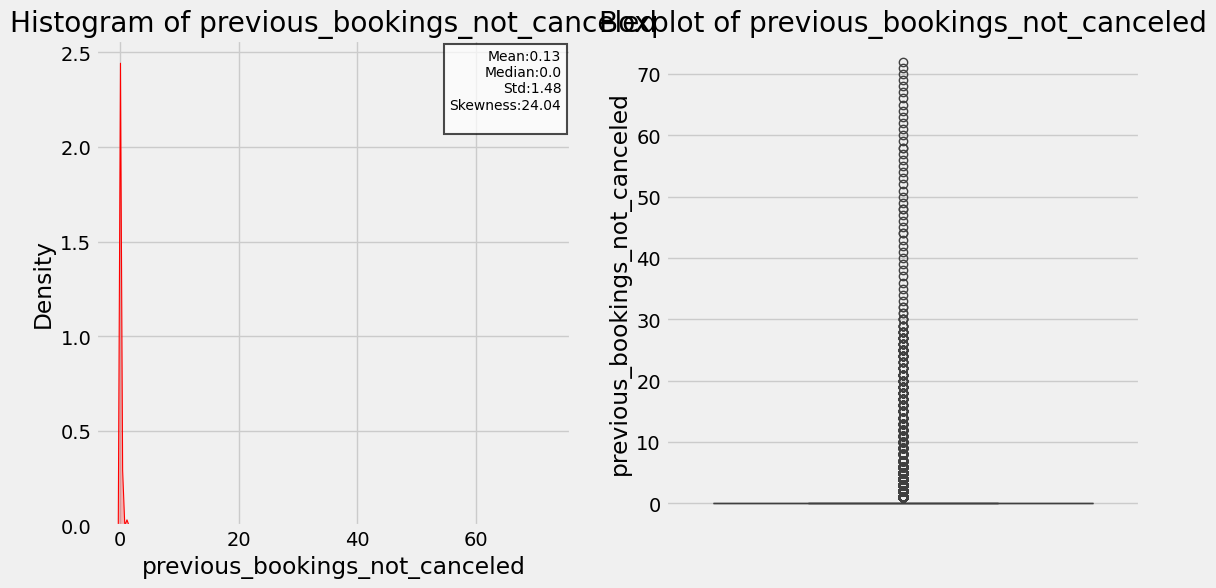

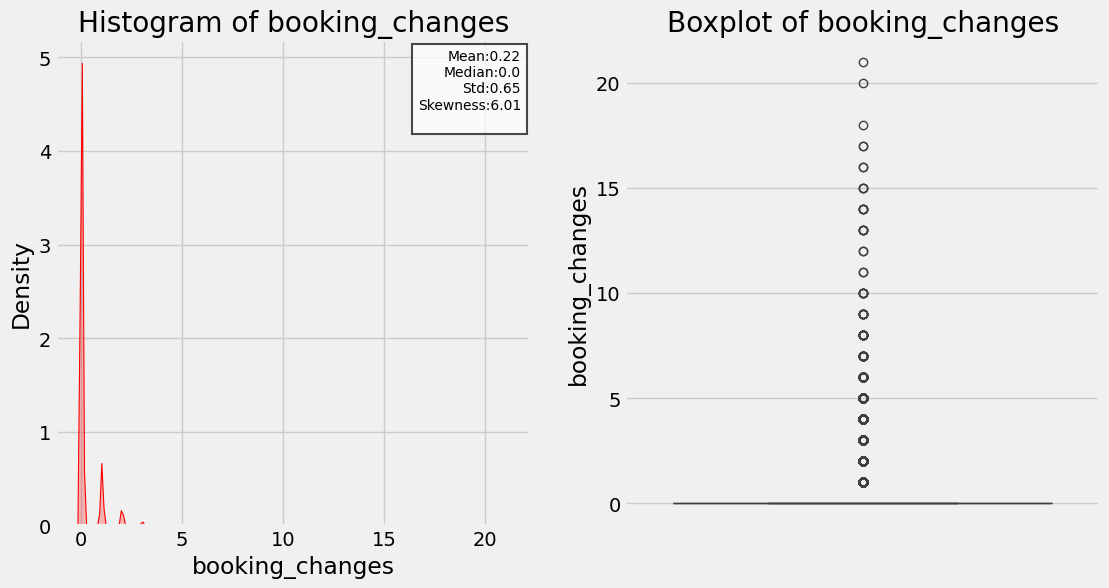

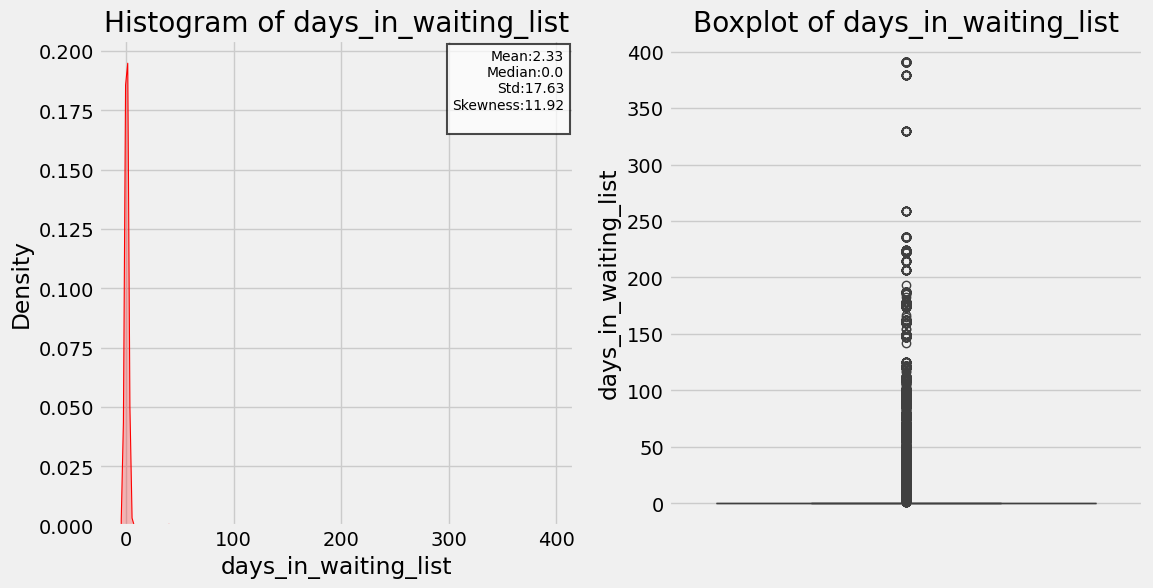

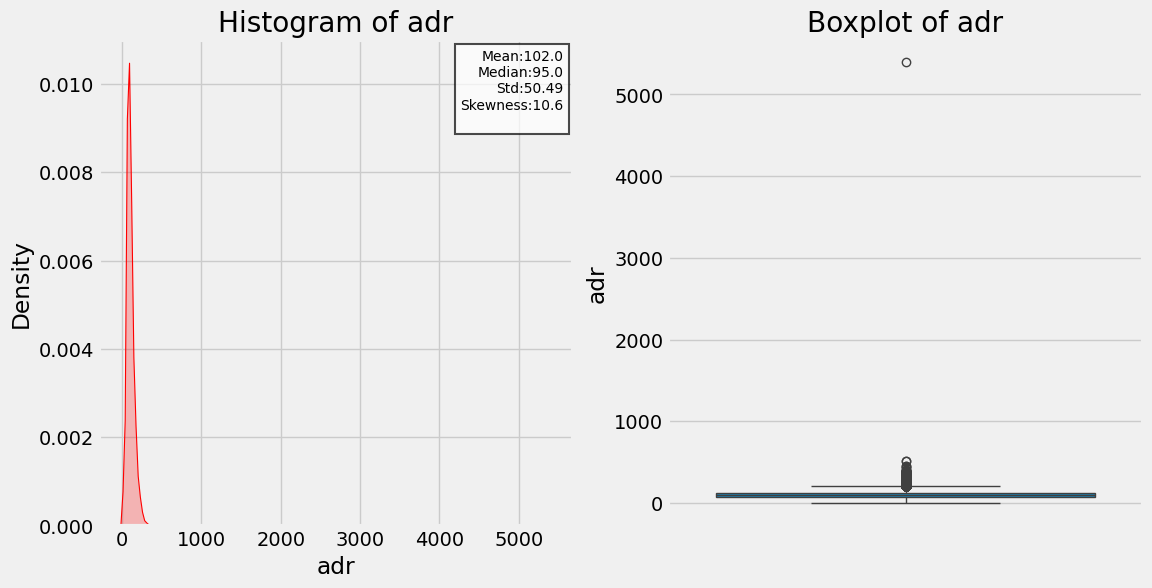

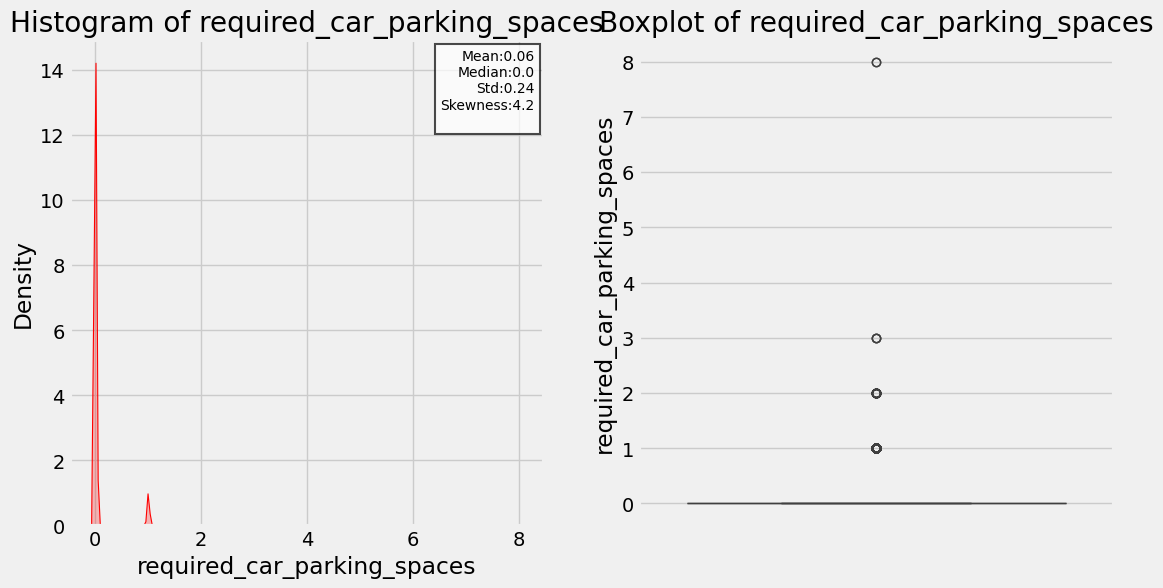

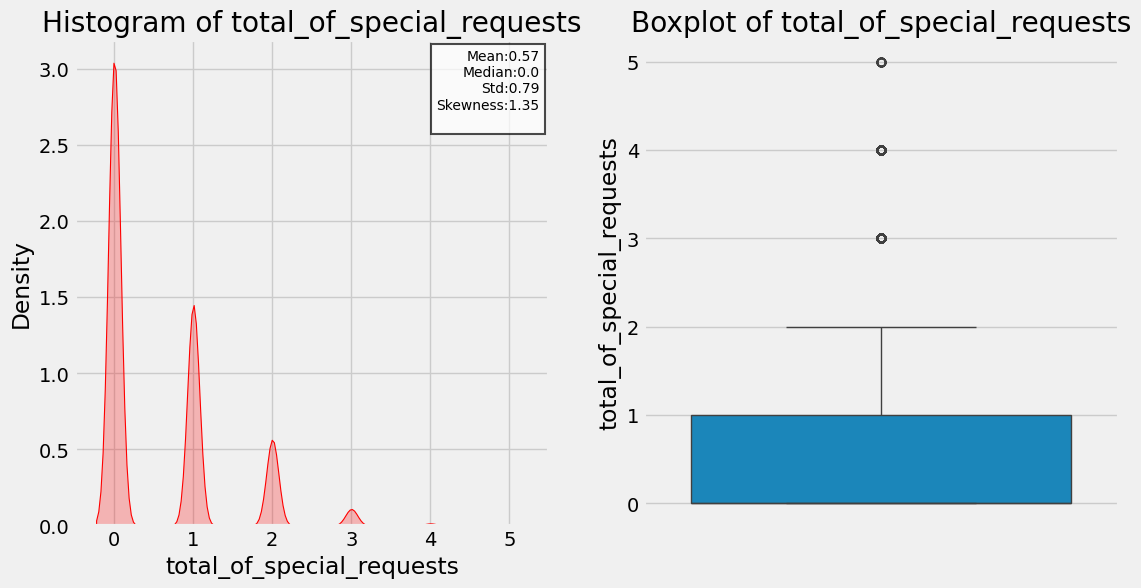

In [21]:
for cols in numerical_column:
    plot_graph(cols)

In [22]:
hotel_copy[hotel_copy['babies']>8]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
46619,City Hotel,0,37,2016,January,3,12,0,2,2,...,Transient,84.45,0,1,Check-Out,2016-01-14,Nicholas Parker,Parker.Nicholas57@hotmail.com,440-692-0519,************4291
78656,City Hotel,0,11,2015,October,42,11,2,1,1,...,Transient-Party,95.00,0,0,Check-Out,2015-10-14,Marc Robinson,Robinson_Marc@protonmail.com,934-726-2629,************1933


In [23]:
hotel_copy[hotel_copy['children']==10]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
328,Resort Hotel,1,55,2015,July,29,12,4,10,2,...,Contract,133.16,0,1,No-Show,2015-07-12,Jamie Ramirez,Ramirez_Jamie22@aol.com,268-823-5667,************7600


In [24]:
hotel_copy[hotel_copy['adults']>35]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
1539,Resort Hotel,1,304,2015,September,36,3,0,3,40,...,Group,0.0,0,0,Canceled,2015-01-02,Brianna Mejia,BriannaMejia@gmail.com,579-877-3361,************5189
1643,Resort Hotel,1,336,2015,September,37,7,1,2,50,...,Group,0.0,0,0,Canceled,2015-01-18,Timothy Clark,Timothy.Clark@comcast.net,902-620-3655,************5474
2173,Resort Hotel,1,338,2015,October,41,4,2,0,55,...,Group,0.0,0,0,Canceled,2015-01-02,Jason Hawkins,Hawkins_Jason@yahoo.com,882-133-0366,************8584


In [25]:
hotel_copy[(hotel_copy['adr']>5000) | (hotel_copy['adr']<0)]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
14969,Resort Hotel,0,195,2017,March,10,5,4,6,2,...,Transient-Party,-6.38,0,0,Check-Out,2017-03-15,Chase Santos,Chase_Santos@outlook.com,472-408-0661,************9176
48515,City Hotel,1,35,2016,March,13,25,0,1,2,...,Transient,5400.00,0,0,Canceled,2016-02-19,Daniel Walter,DanielWalter27@comcast.net,865-280-5832,************6075


In [26]:
hotel_copy.drop(index=[14969,48515,2173,1643,1539,328],inplace=True)

To ensure data quality some of the values that misrepresented the dataset were neglected:
- One of the reservation included 10 children which is not normal, plus this was also cancelled indicating that this might be an outlier, thus it was removed.
- Three customers had booked which included 35 plus adults which is a highly improbable scenario for hotel bookings and all of these were also cancelled, thus these rows were dropped.
-  Two entries in the ADR column were identified as outliers—one with a negative value and another with a value exceeding 5000.ADR, representing revenue per night, cannot logically be negative, and extremely high values are likely the result of data entry errors or misrecorded transactions. Thus, these records were deleted.

#### Inspecting the target variable:

In [27]:
round((hotel_copy['is_canceled'].value_counts(normalize=True))*100,1)

is_canceled
0    62.9
1    37.1
Name: proportion, dtype: float64

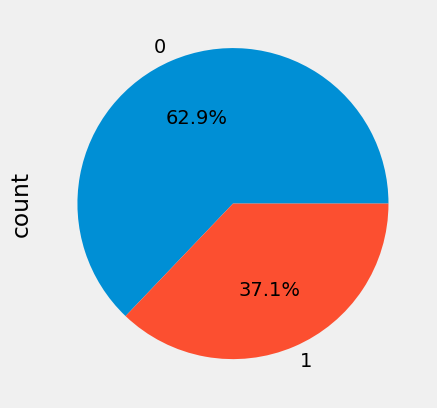

In [28]:
hotel_copy['is_canceled'].value_counts().plot(kind='pie',autopct="%1.1f%%")

plt.show()

The `pie-chart` reveals that the target variable (is_canceled) is imbalanced, which is obvious as less customers are likely to cancel their booking. Still, a 37.1% cancellation rate is substantial, and discovering reasons to why customers cancel their reservation helps businesses create strategies for customer retention, to optimize resource allocation, and enhance overall service quality

#### Bivariate Analysis 

In [29]:
def univaraite_categorical_plot(df,categorical_feature):
    count=df.groupby([categorical_feature,'is_canceled']).size().reset_index(name='Count')
    total_counts=df.groupby([categorical_feature]).size().reset_index(name='total')
    merged=pd.merge(count,total_counts,on=categorical_feature)
    merged['Percentage']=(merged['Count']/merged['total'])*100
        
    fig,ax=plt.subplots(figsize=(15,5))
    ax=sns.barplot(data=merged,x=categorical_feature,y='Percentage',hue='is_canceled',ax=ax,palette='deep',edgecolor='black')
    
    for p in ax.patches:
        height = p.get_height()
        if height > 0:  
            ax.annotate(f'{height:.1f}%', 
                        (p.get_x() + p.get_width() / 2, height),
                        ha='center', va='bottom',color='black', weight='bold', fontsize=12)

    ax.legend(loc='upper right')
    plt.tight_layout()
    plt.show()

In [30]:
non_categorical=[ 'name','email','phone-number','country','reservation_status','credit_card']

In [31]:
categorical_features=[cols for cols in hotel_copy.columns if hotel_copy.dtypes[cols] in ['object'] and cols not in non_categorical]
categorical_features

['hotel',
 'arrival_date_month',
 'meal',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type']

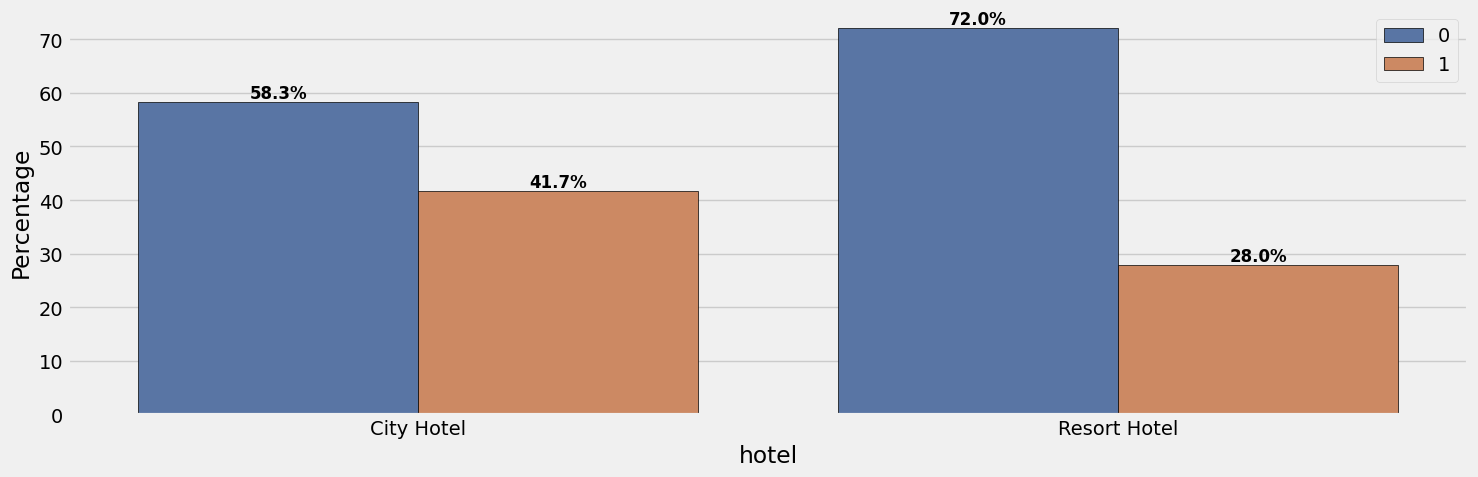

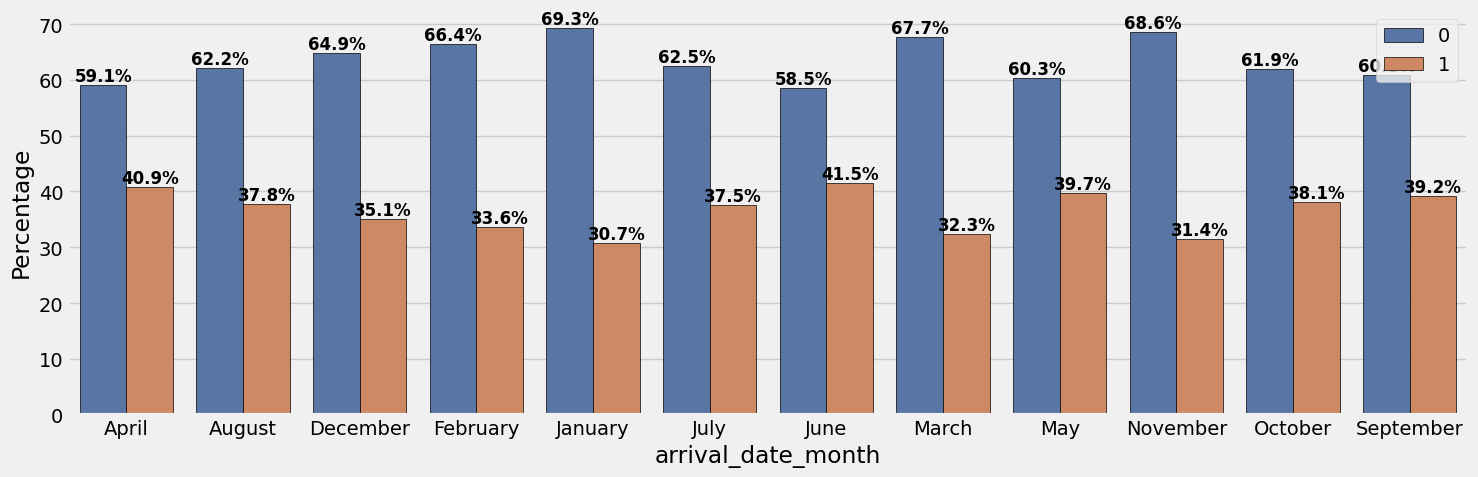

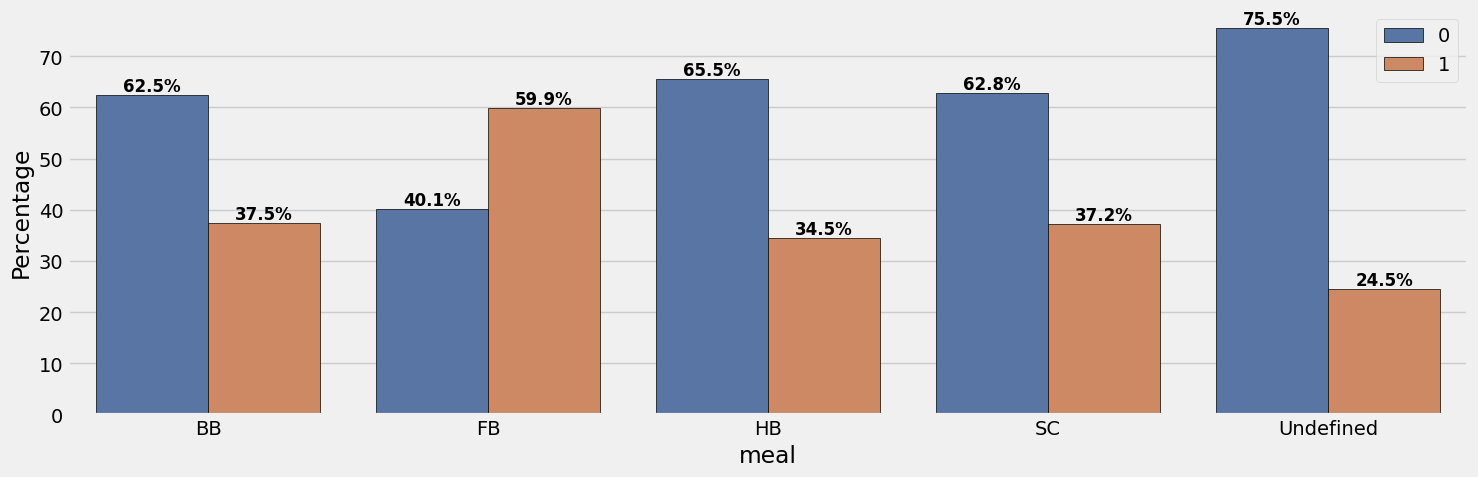

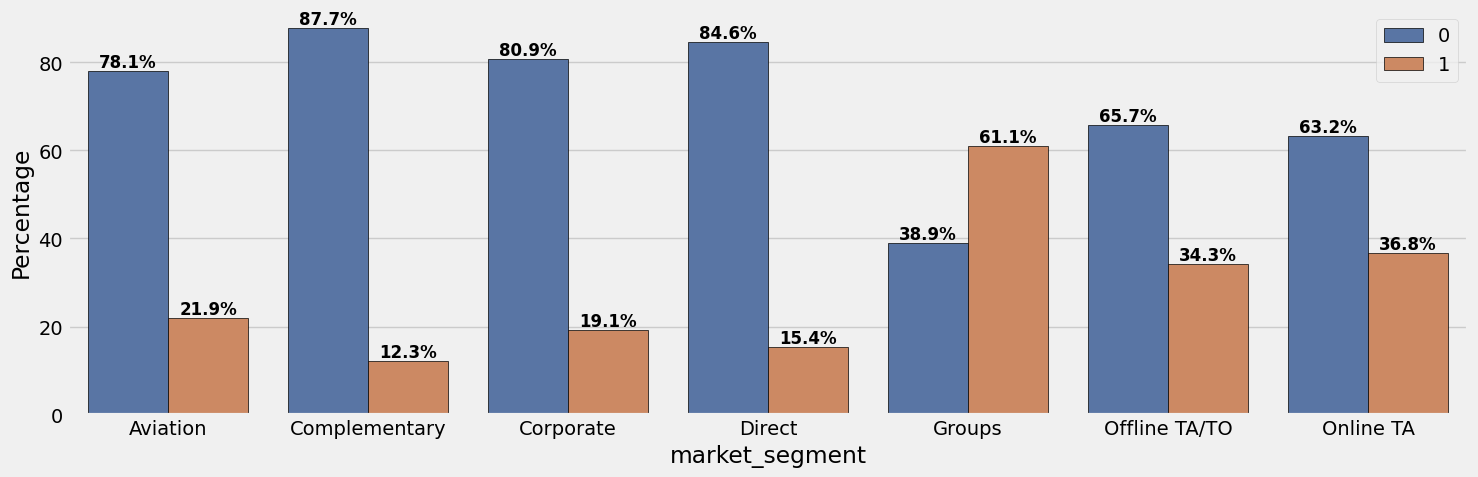

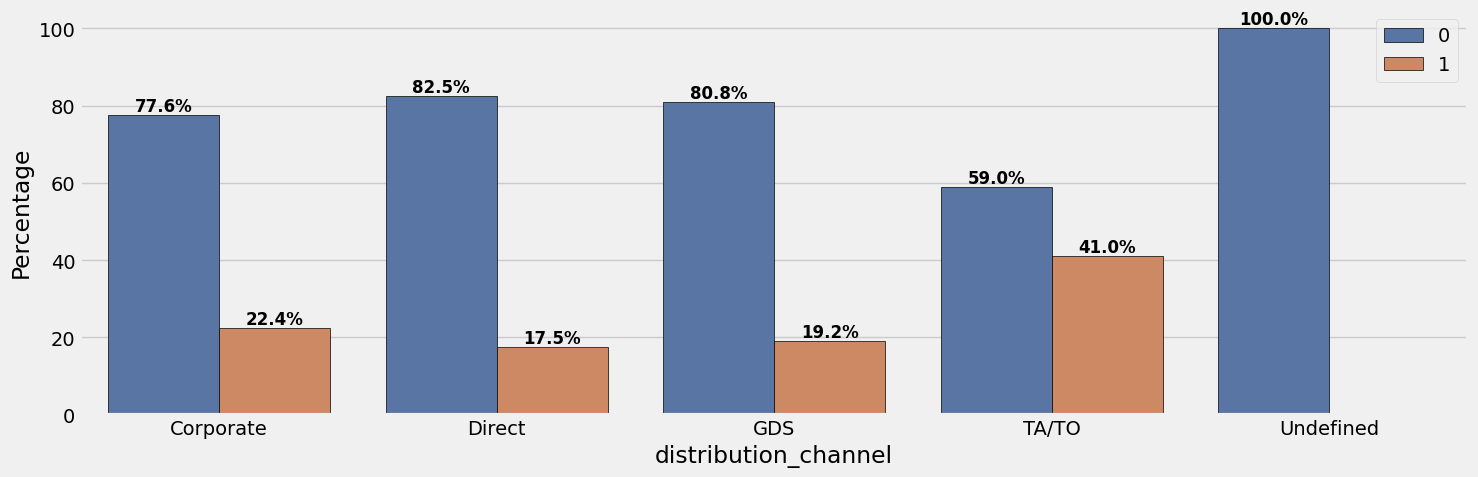

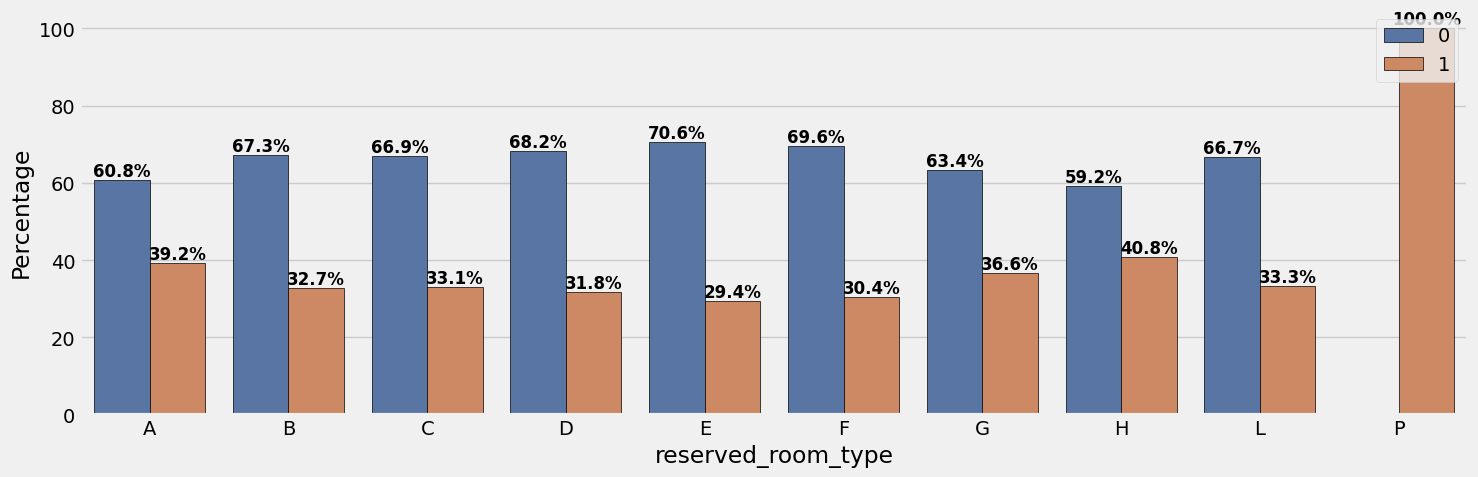

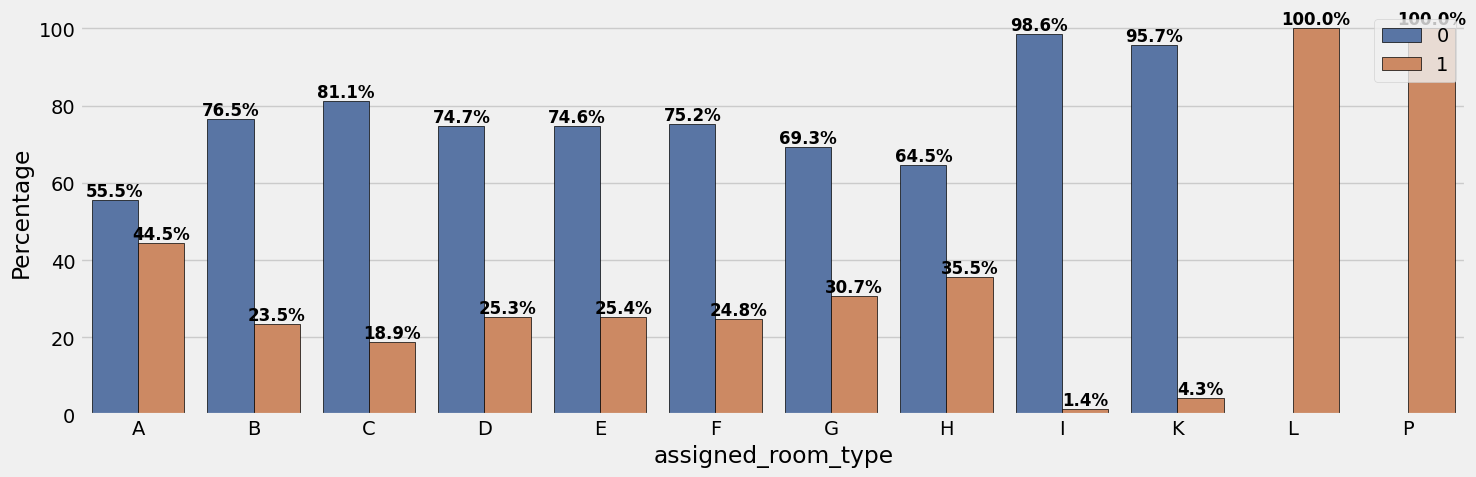

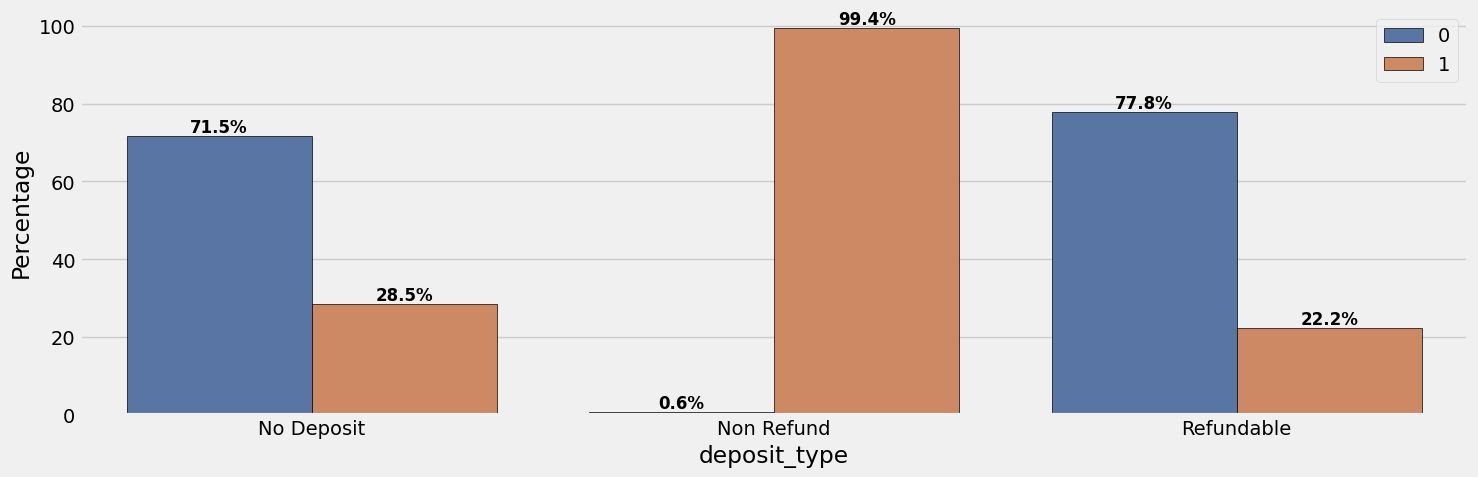

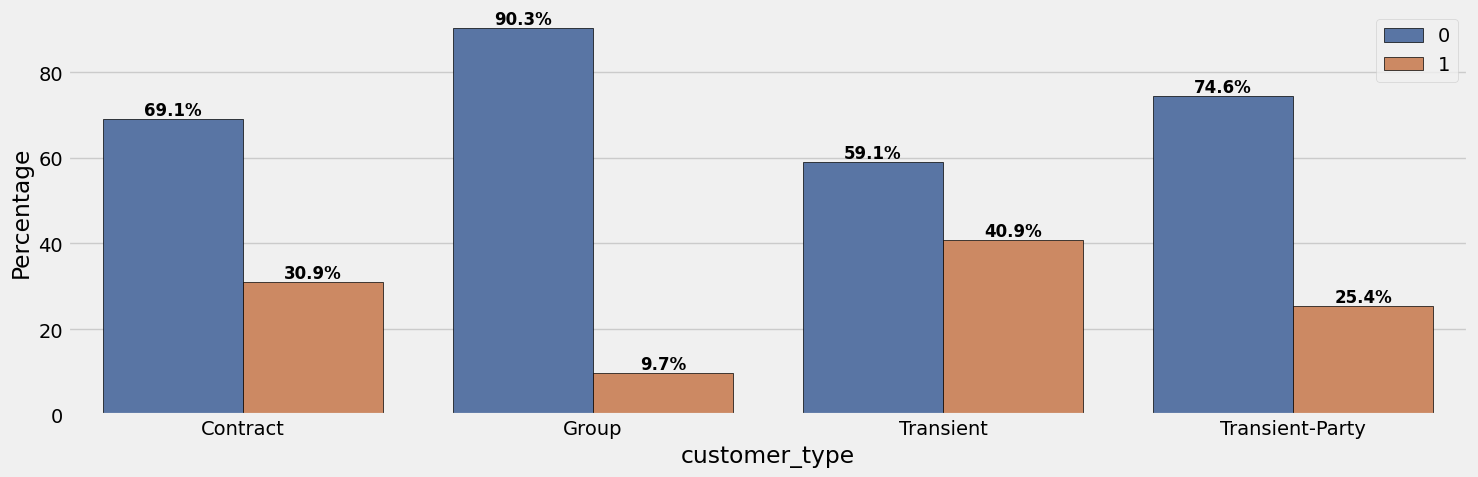

In [32]:
for col in categorical_features:
    univaraite_categorical_plot(hotel_copy,col)

**Hotel:** Customers booking at City Hotel exhibit a notably higher cancellation rate (41.7%) compared to those booking at Resort Hotel (28%). The significant difference may be attributed to factors such as higher average prices in City Hotels or potential dissatisfaction with services provided.

**Deposit Type:** This feature reveals a surprising pattern in cancellation behavior. While the cancellation among non-deposit (28.5%) and refundable (22.2%) align with typical expectations, the cancellation rate for non-refundable bookings is exceptionally high at 99.4%. Non-refundable booking are expected to deter cancellations, so such a striking pattern requires further investigation to determine if the data is accurate or if their is any systematic issues on how cancellation was recorded.

**Customer Type:** Transient booking, which are typically short-term and leisure-oriented, have a high cancellation rate of 40.9%. This may be because customers booking for short trips are more flexible and less committed, leading to a higher cancellation rates.In contrast, other customer types, such as group or contract bookings, may have stricter commitments or incentives to follow through with their reservations, resulting in lower cancellation rates

In [33]:
hotel_copy['country'].nunique()

177

In [34]:
grouped=hotel_copy.groupby([hotel_copy['country'].str.title(),'is_canceled']).size().unstack(fill_value=0)

In [35]:
top10_countries=grouped.sum(axis=1).sort_values(ascending=False).head(20).index

In [36]:
top10_data=grouped.loc[top10_countries]

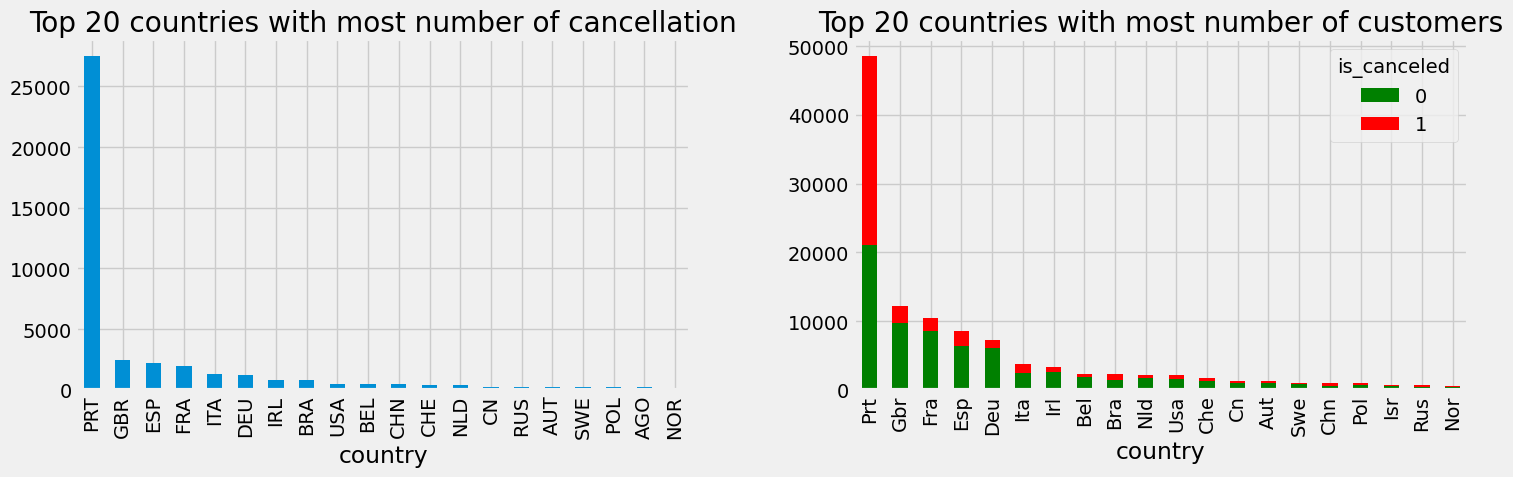

In [37]:
fig,ax=plt.subplots(nrows=1,ncols=2)

top10_data.plot(kind='bar', stacked=True, figsize=(15,5), color=['green', 'red'],ax=ax[1])
hotel_copy[hotel_copy['is_canceled']==1]['country'].value_counts().head(20).plot(kind='bar',ax=ax[0])

ax[1].set_title("Top 20 countries with most number of customers")
ax[0].set_title("Top 20 countries with most number of cancellation")

plt.tight_layout(w_pad=5)
plt.show()

The first barplot indicates that most number of cancellation comes from tourists residing in Portugal. Portugal's customers tend to cancel more than 5 times the second most popular country Great Britian. This disparity might be because more tourists make hotel reservations resulting in higher cancellations. 

The second barplot shows that for the top 20 countries, in terms of number of tourists, have a relatively lower cancellation rate in comparision with people who turn up. The only exception to this trend is Portugal, with nearly half of its tourists opting to cancel their reservations. This unusually high cancellation rate suggests a unique behavior and a need to consider why people from Portugal cancel their reservations.

<Axes: ylabel='Frequency'>

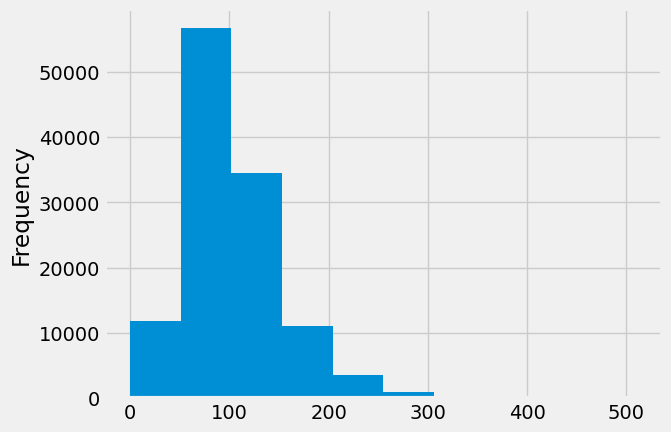

In [40]:
hotel_copy['adr'].plot(kind='hist')